In [35]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths
import matplotlib.cm as cm
import colormaps as cmaps
from colormaps.utils import show_cmaps_collection
from scipy.optimize import curve_fit



In [36]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# Increasing Ablation

Grounding Line Plot - Amax-0.06


In [37]:
gl_run_title_amin06 = str("Grounding Line Evolution Over Time - Max Ablation - 0.06")
amin_06 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_22__10_24_28.pkl.gz"
with gzip.open(amin_06, 'rb') as f:
    DATA_dict_amin_06 = pickle.load(f)

In [38]:
bed_dict = DATA_dict_amin_06['bed_dict']
base_dict = DATA_dict_amin_06['base_dict']
surf_dict= DATA_dict_amin_06 ['surf_dict']
sed_dict = DATA_dict_amin_06['sed_dict']
H_dict = DATA_dict_amin_06['H_dict']
us_dict_06 = DATA_dict_amin_06['us_dict']
ub_dict_06 = DATA_dict_amin_06['ub_dict']
Hs_dict = DATA_dict_amin_06['Hs_dict']
GL_dict_06 = DATA_dict_amin_06['GL_dict']
Qs_dict_06 = DATA_dict_amin_06['Qs_dict']

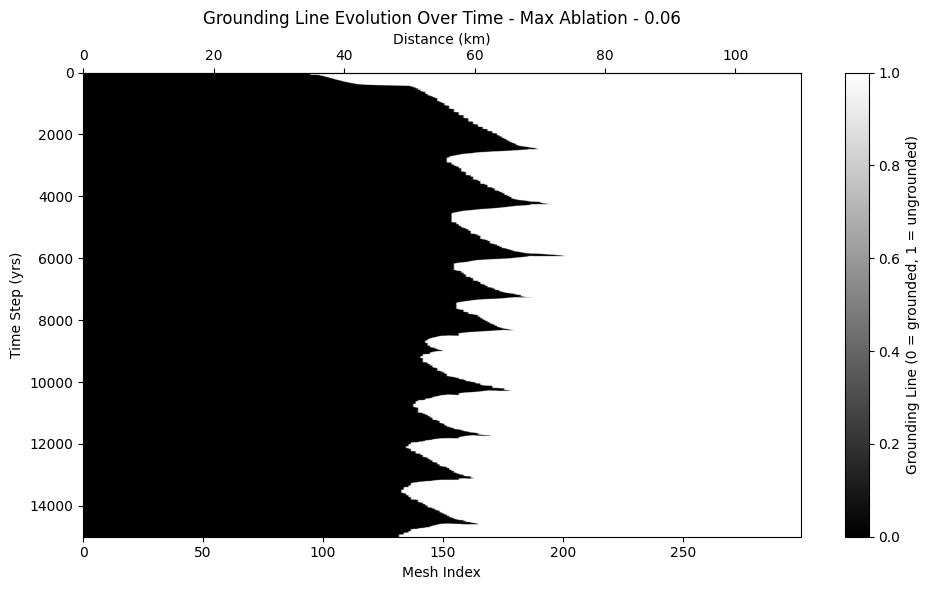

In [39]:
GL_dict = DATA_dict_amin_06['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin06)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [40]:
gl_positions_amin06 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin06.append(idx)

gl_positions_amin06 = np.array(gl_positions_amin06)
GL_km_amin06 = mesh_index_to_km(gl_positions_amin06)

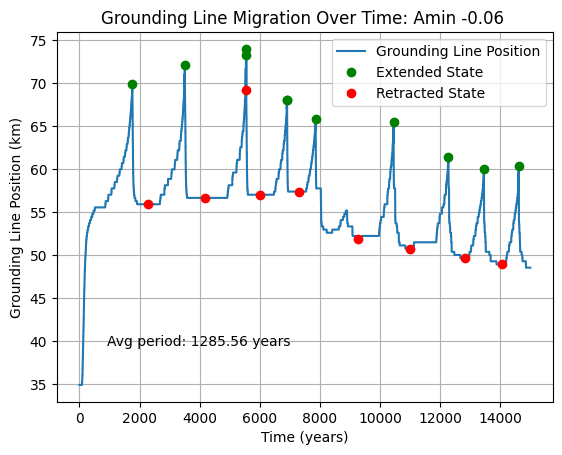

Mean cycle period: 1285.56 years
[1748.61375255 2035.18146493    4.31554979 1354.68747398    4.01273575
  951.70857304 2592.36928864 1822.96801812 1176.96644267 1164.81810624]
Mean advance amplitude: 67.12 km
[69.89966555 72.10702341 73.21070234 73.94648829 68.06020067 68.06020067
 65.85284281 65.48494983 61.43812709 59.96655518 60.33444816]
Mean retreat amplitude: 55.27 km
[55.91973244 56.65551839 69.1638796  57.02341137 57.39130435 51.8729097
 50.76923077 49.66555184 48.92976589]


In [41]:
peaks_amin06, _ = find_peaks(GL_km_amin06, prominence=3) 
troughs_amin06, _ = find_peaks(-GL_km_amin06, prominence=3)     
periods_amin06 = np.diff(np.array(time)[peaks_amin06])
adv_dists_amin06 = GL_km_amin06[peaks_amin06]
ret_dists_amin06 = GL_km_amin06[troughs_amin06]


plt.plot(time, GL_km_amin06, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin06], GL_km_amin06[peaks_amin06], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin06], GL_km_amin06[troughs_amin06], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin06):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin -0.06 ")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin06):.2f} years")
print(periods_amin06)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin06):.2f} km")
print(adv_dists_amin06)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin06):.2f} km")
print(ret_dists_amin06)


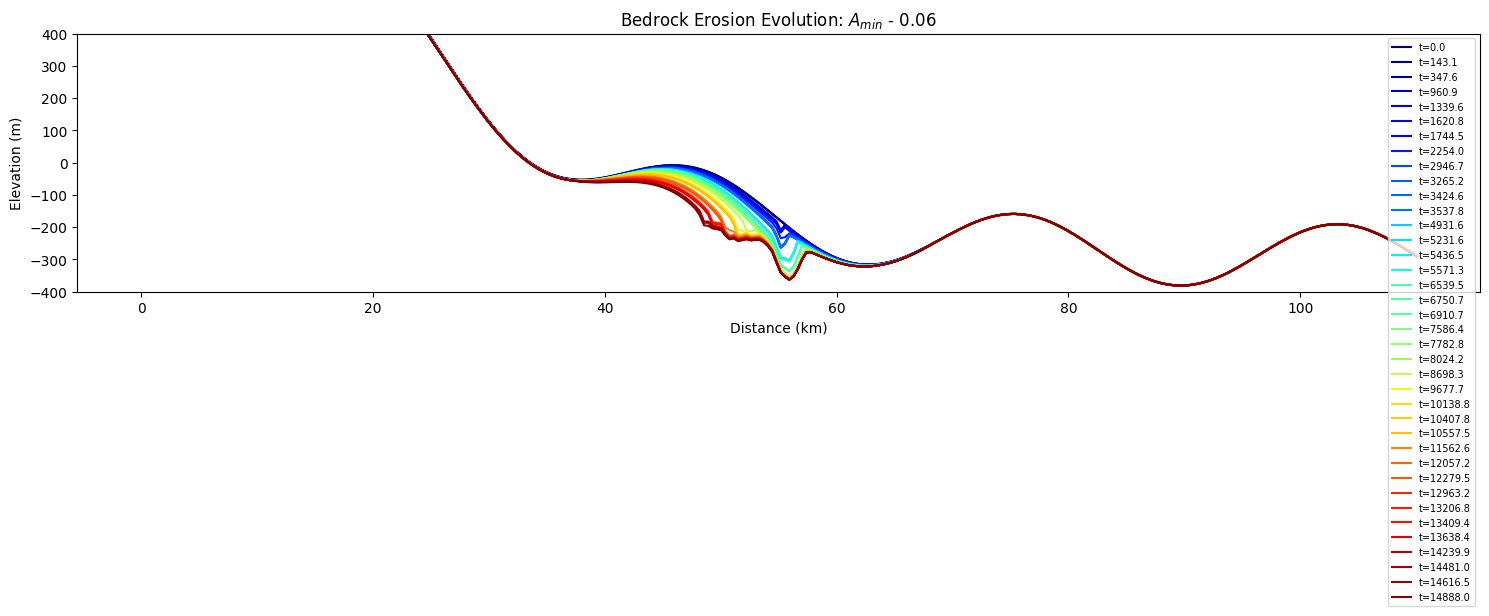

In [42]:
bed_dict = DATA_dict_amin_06['bed_dict']
num_points = len(next(iter(bed_dict.values())))
x_km = mesh_index_to_km(np.arange(num_points))
time = list(bed_dict.keys())
# bed_profile = bed_dict[timesteps[0]] 
norm = plt.Normalize(min(time), max(time))
cmap = cm.jet

fig, ax1 = plt.subplots(figsize=(15,5))

for i, t in enumerate(time):
    if i % 400 != 0:  
        continue

    bed = bed_dict[t]
    color = cmap(norm(t))
    plt.plot(x_km, bed, color=color, label=f't={t:.1f}' if i % 25 == 0 else "")

plt.xlabel("Distance (km)")
plt.ylabel("Elevation (m)")
plt.title("Bedrock Erosion Evolution: $A_{min}$ - 0.06 ")
# plt.gca().invert_xaxis() 
plt.legend(loc="upper right", fontsize=7)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# plt.xlim(30,100)
plt.ylim(-400,400)
# plt.colorbar(sm, label='Time (years)', ax=plt.gca())
# plt.axvline(x=0, color='gray', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amax/GL_Plots/Relationship_Plots/Bedrock_Evo_amax5.svg", format ="svg", bbox_inches='tight')

22646.675622131355


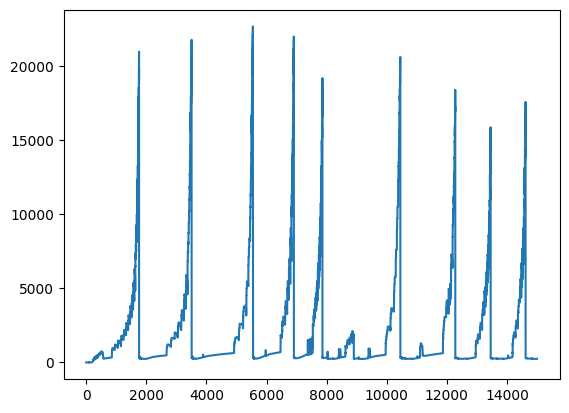

In [43]:
max_Qs_06 = np.array([max(values) for values in Qs_dict_06.values()])
time_06 = np.array(list(Qs_dict_06.keys()))

# mask = time_06 <= 10000

# time_06 = time_06[mask]
# max_Qs_06 = max_Qs_06[mask]
plt.plot(time_06, max_Qs_06)
MAX_06 = np.max(max_Qs_06)

# MAX_21 = np.median(max_Qs_06)
print(MAX_06)

Grounding Line Plot - Amin - 0.05


In [44]:
gl_run_title_amin05 = str("Grounding Line Evolution Over Time - Max Ablation -0.05")
amin05 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_18__13_49_16.pkl.gz"
with gzip.open(amin05, 'rb') as f:
    DATA_dict_amin05 = pickle.load(f)

In [45]:
bed_dict = DATA_dict_amin05['bed_dict']
base_dict = DATA_dict_amin05['base_dict']
surf_dict= DATA_dict_amin05 ['surf_dict']
sed_dict = DATA_dict_amin05['sed_dict']
H_dict = DATA_dict_amin05['H_dict']
us_dict_05 = DATA_dict_amin05['us_dict']
ub_dict_05 = DATA_dict_amin05['ub_dict']
Hs_dict = DATA_dict_amin05['Hs_dict']
GL_dict_05 = DATA_dict_amin05['GL_dict']
Qs_dict_05 = DATA_dict_amin05['Qs_dict']

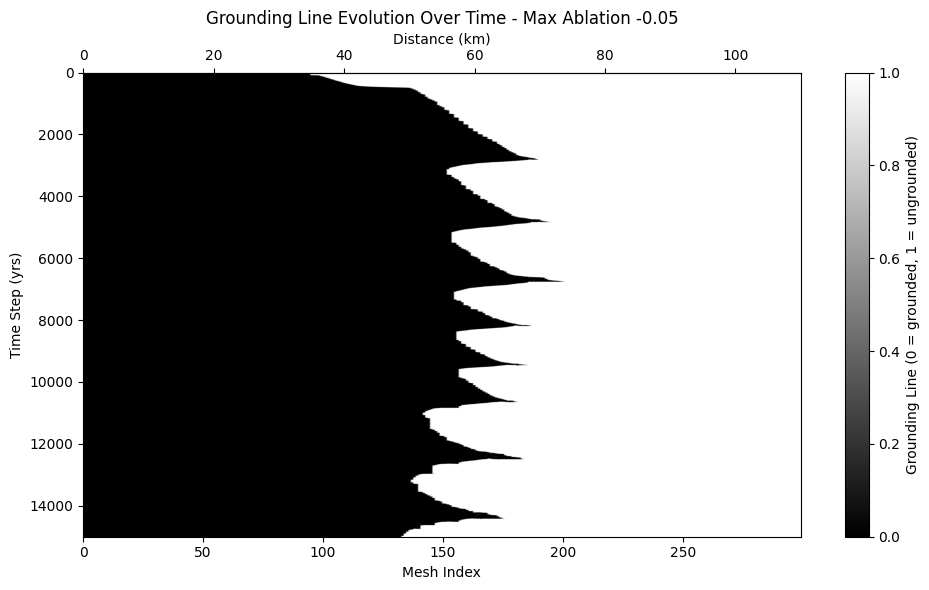

In [46]:
GL_dict = DATA_dict_amin05['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin05)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [47]:
gl_positions_amin05 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin05.append(idx)

gl_positions_amin05 = np.array(gl_positions_amin05)
GL_km_amin05 = mesh_index_to_km(gl_positions_amin05)



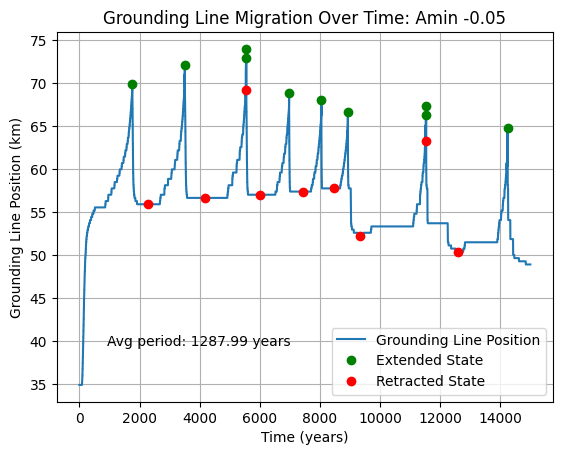

Mean cycle period: 1287.99 years
[1890.32908611 1363.38198919  451.53820233 1443.36325667 1046.65334116
  844.8796025  2199.67749702 1064.0575948 ]
Mean advance amplitude: 69.05 km
[69.89966555 72.10702341 72.84280936 73.94648829 68.79598662 68.06020067
 66.58862876 66.22073579 67.32441472 64.74916388]
Mean retreat amplitude: 57.76 km
[55.91973244 56.65551839 69.1638796  57.02341137 57.39130435 57.75919732
 52.24080268 63.27759197 50.40133779]


In [48]:
peaks_amin05, _ = find_peaks(GL_km_amin05, prominence=2.8) 
troughs_amin05, _ = find_peaks(-GL_km_amin05, prominence=2.8)     
periods_amin05 = np.diff(np.array(time)[troughs_amin05])
adv_dists_amin05 = GL_km_amin05[peaks_amin05]
ret_dists_amin05 = GL_km_amin05[troughs_amin05]


plt.plot(time, GL_km_amin05, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin05], GL_km_amin05[peaks_amin05], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin05], GL_km_amin05[troughs_amin05], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin05):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin -0.05")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin05):.2f} years")
print(periods_amin05)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin05):.2f} km")
print(adv_dists_amin05)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin05):.2f} km")
print(ret_dists_amin05)


22264.72856187399


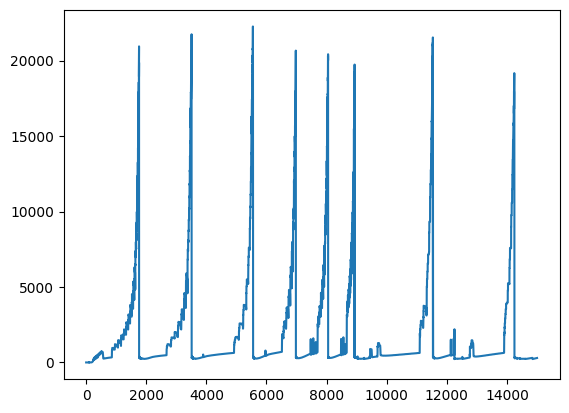

In [49]:
max_Qs_05 = np.array([max(values) for values in Qs_dict_05.values()])
time_05 = np.array(list(Qs_dict_05.keys()))

# mask = time_05 <= 10000

# time_05 = time_05[mask]
# max_Qs_05 = max_Qs_05[mask]
plt.plot(time_05, max_Qs_05)
MAX_05 = np.max(max_Qs_05)

# MAX_21 = np.median(max_Qs_55)
print(MAX_05)

Grounding Line Plot - Amin - 0.02


In [50]:
gl_run_title_amin02 = str("Grounding Line Evolution Over Time - Max Ablation - 0.02")
amin02 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_18__16_25_14.pkl.gz"
with gzip.open(amin02, 'rb') as f:
    DATA_dict_amin02 = pickle.load(f)

In [51]:
bed_dict = DATA_dict_amin02['bed_dict']
base_dict = DATA_dict_amin02['base_dict']
surf_dict= DATA_dict_amin02['surf_dict']
sed_dict = DATA_dict_amin02['sed_dict']
H_dict = DATA_dict_amin02['H_dict']
us_dict_02 = DATA_dict_amin02['us_dict']
ub_dict_02 = DATA_dict_amin02['ub_dict']
Hs_dict = DATA_dict_amin02['Hs_dict']
GL_dict_02 = DATA_dict_amin02['GL_dict']
Qs_dict_02 = DATA_dict_amin02['Qs_dict']

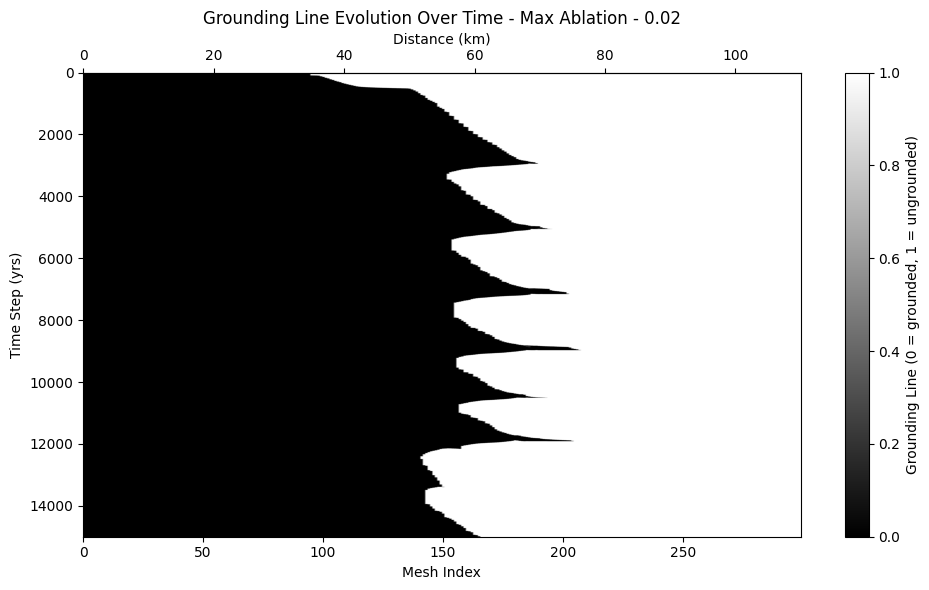

In [52]:
GL_dict = DATA_dict_amin02['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin02)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [53]:
gl_positions_amin02 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin02.append(idx)

gl_positions_amin02 = np.array(gl_positions_amin02)
GL_km_amin02 = mesh_index_to_km(gl_positions_amin02)



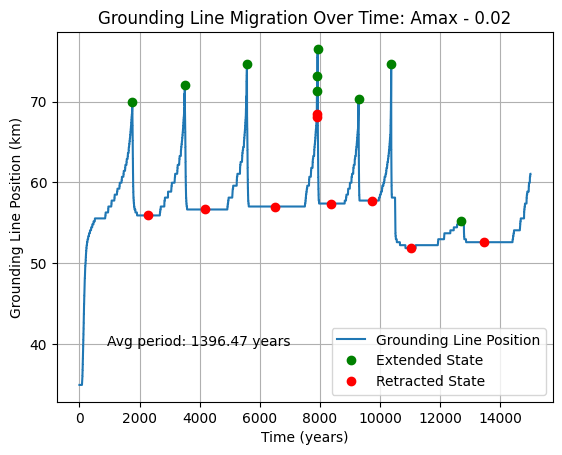

Mean cycle period: 1396.47 years
[1890.32908611 2315.65038162 1410.20481777    7.46512463  453.43843139
 1358.09882629 1302.86544841 2433.71732995]
Mean advance amplitude: 70.88 km
[69.89966555 72.10702341 74.68227425 71.37123746 73.21070234 76.52173913
 70.26755853 74.68227425 55.18394649]
Mean retreat amplitude: 58.41 km
[55.91973244 56.65551839 57.02341137 68.06020067 68.42809365 57.39130435
 57.75919732 51.8729097  52.60869565]


In [54]:
peaks_amin02, _ = find_peaks(GL_km_amin02, prominence=2) 
troughs_amin02, _ = find_peaks(-GL_km_amin02, prominence=2)     
periods_amin02 = np.diff(np.array(time)[troughs_amin02])
adv_dists_amin02 = GL_km_amin02[peaks_amin02]
ret_dists_amin02 = GL_km_amin02[troughs_amin02]


plt.plot(time, GL_km_amin02, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin02], GL_km_amin02[peaks_amin02], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin02], GL_km_amin02[troughs_amin02], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin02):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax - 0.02")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin02):.2f} years")
print(periods_amin02)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin02):.2f} km")
print(adv_dists_amin02)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin02):.2f} km")
print(ret_dists_amin02)


23538.04594195235


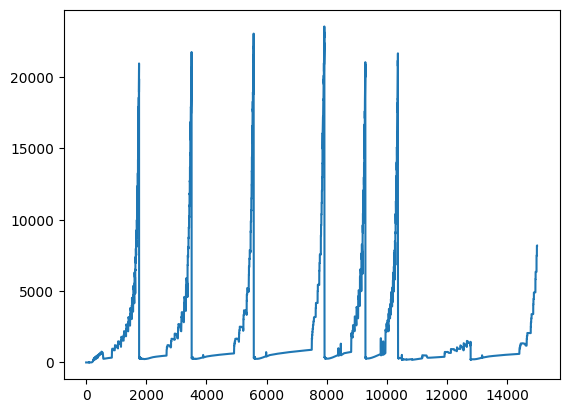

In [55]:
max_Qs_02 = np.array([max(values) for values in Qs_dict_02.values()])
time_02 = np.array(list(Qs_dict_02.keys()))

# mask = time_02 <= 10000

# time_02 = time_02[mask]
# max_Qs_02 = max_Qs_02[mask]
plt.plot(time_02, max_Qs_02)
MAX_02 = np.max(max_Qs_02)

# MAX_21 = np.median(max_Qs_02)
print(MAX_02)

Grounding Line Plot - Amin - 0.01


In [56]:
gl_run_title_amin01 = str("Grounding Line Evolution Over Time - Max Ablation - 0.01")
amin01 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_19__10_04_31.pkl.gz"
with gzip.open(amin01, 'rb') as f:
    DATA_dict_amin01 = pickle.load(f)

In [57]:
bed_dict = DATA_dict_amin01['bed_dict']
base_dict = DATA_dict_amin01['base_dict']
surf_dict= DATA_dict_amin01['surf_dict']
sed_dict = DATA_dict_amin01['sed_dict']
H_dict = DATA_dict_amin01['H_dict']
us_dict_01 = DATA_dict_amin01['us_dict']
ub_dict_01 = DATA_dict_amin01['ub_dict']
Hs_dict = DATA_dict_amin01['Hs_dict']
GL_dict_01 = DATA_dict_amin01['GL_dict']
Qs_dict_01 = DATA_dict_amin01['Qs_dict']

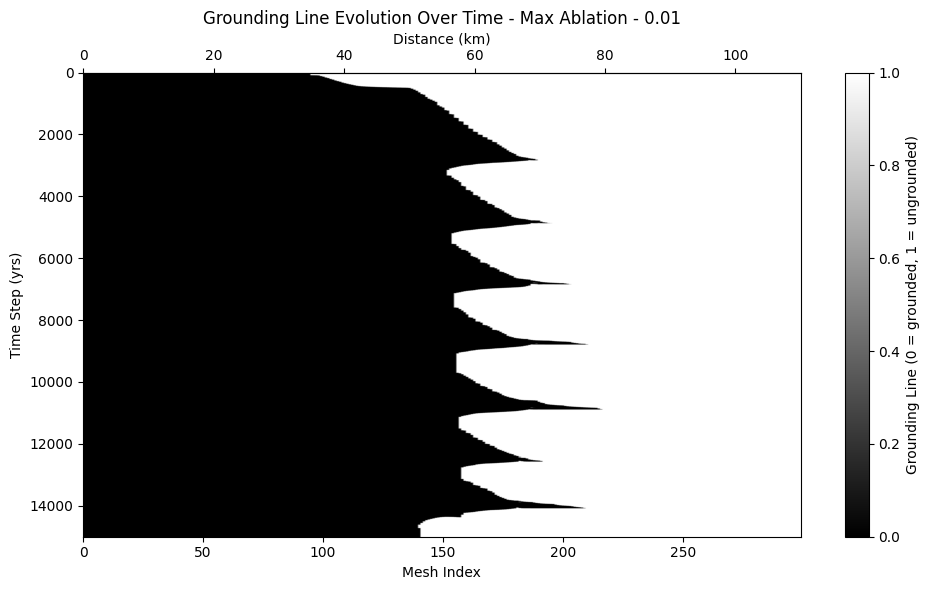

In [58]:
GL_dict = DATA_dict_amin01['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin01)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [59]:
gl_positions_amin01 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin01.append(idx)

gl_positions_amin01 = np.array(gl_positions_amin01)
GL_km_amin01 = mesh_index_to_km(gl_positions_amin01)
# mask = np.array(time) <= 10000
# time = np.array(time)[mask]
# GL_km_amin01 = GL_km_amin01[mask]


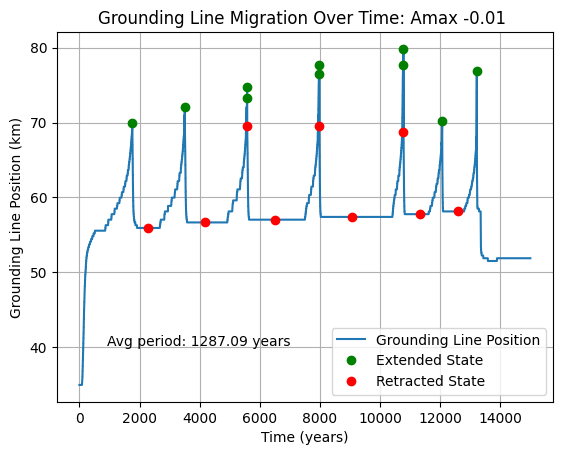

Mean cycle period: 1287.09 years
[1890.32908611 1394.17387896  928.19726484 1471.85727723 1089.70353839
 1707.66187706  576.55918926 1238.25942497]
Mean advance amplitude: 74.87 km
[69.89966555 72.10702341 73.21070234 74.68227425 76.52173913 77.62541806
 77.62541806 79.83277592 70.26755853 76.88963211]
Mean retreat amplitude: 61.19 km
[55.91973244 56.65551839 69.53177258 57.02341137 69.53177258 57.39130435
 68.79598662 57.75919732 58.1270903 ]


In [60]:
peaks_amin01, _ = find_peaks(GL_km_amin01, prominence=3) 
troughs_amin01, _ = find_peaks(-GL_km_amin01, prominence=3)     
periods_amin01 = np.diff(np.array(time)[troughs_amin01])
adv_dists_amin01 = GL_km_amin01[peaks_amin01]
ret_dists_amin01 = GL_km_amin01[troughs_amin01]


plt.plot(time, GL_km_amin01, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin01], GL_km_amin01[peaks_amin01], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin01], GL_km_amin01[troughs_amin01], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin01):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax -0.01 ")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin01):.2f} years")
print(periods_amin01)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin01):.2f} km")
print(adv_dists_amin01)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin01):.2f} km")
print(ret_dists_amin01)


25093.127492314507


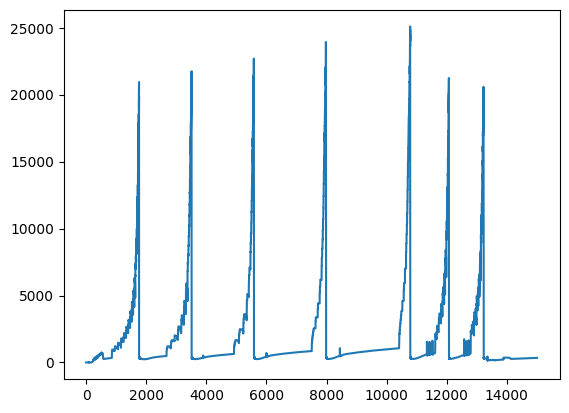

In [61]:
max_Qs_01 = np.array([max(values) for values in Qs_dict_01.values()])
time_01 = np.array(list(Qs_dict_01.keys()))

plt.plot(time_01, max_Qs_01)
MAX_01 = np.max(max_Qs_01)

print(MAX_01)

Grounding Line Plot - Amin & Amax -0.05


In [71]:
gl_run_title_amax_amin_05 = str("Grounding Line Evolution Over Time - Ablation & Accumulation - 0.05")
amax_amin_05 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_25__14_21_57.pkl.gz"
with gzip.open(amax_amin_05, 'rb') as f:
    DATA_dict_amax_amin_05 = pickle.load(f)

In [72]:
bed_dict = DATA_dict_amax_amin_05['bed_dict']
base_dict = DATA_dict_amax_amin_05['base_dict']
surf_dict= DATA_dict_amax_amin_05['surf_dict']
sed_dict = DATA_dict_amax_amin_05['sed_dict']
H_dict = DATA_dict_amax_amin_05['H_dict']
us_dict_accabl = DATA_dict_amax_amin_05['us_dict']
ub_dict_accabl = DATA_dict_amax_amin_05['ub_dict']
Hs_dict = DATA_dict_amax_amin_05['Hs_dict']
GL_dict_ = DATA_dict_amax_amin_05['GL_dict']
Qs_dict_accabl = DATA_dict_amax_amin_05['Qs_dict']

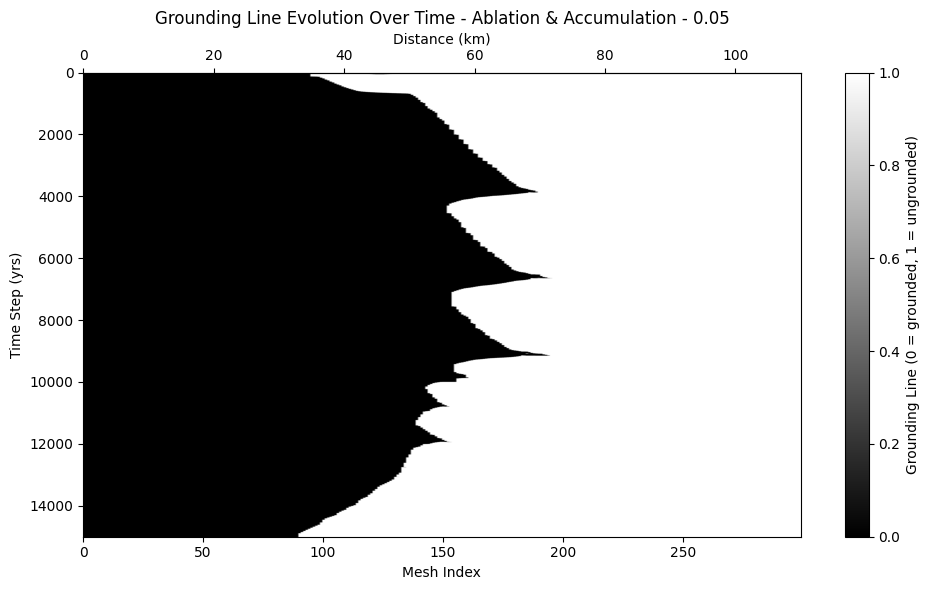

In [73]:
GL_dict = DATA_dict_amax_amin_05['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax_amin_05)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [74]:
gl_positions_amax_amin_05 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax_amin_05.append(idx)

gl_positions_amax_amin_05 = np.array(gl_positions_amax_amin_05)
GL_km_amax_amin_05 = mesh_index_to_km(gl_positions_amax_amin_05)
# mask = np.array(time) <= 10000
# time = np.array(time)[mask]
# GL_km_amax_amin_05 = GL_km_amax_amin_05[mask]


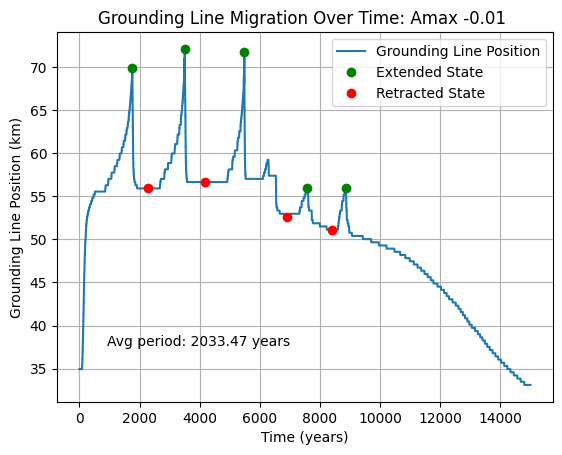

Mean cycle period: 2033.47 years
[1890.32908611 2711.70505601 1498.36511603]
Mean advance amplitude: 65.12 km
[69.89966555 72.10702341 71.73913043 55.91973244 55.91973244]
Mean retreat amplitude: 54.08 km
[55.91973244 56.65551839 52.60869565 51.13712375]


In [75]:
peaks_amax_amin_05, _ = find_peaks(GL_km_amax_amin_05, prominence=3) 
troughs_amax_amin_05, _ = find_peaks(-GL_km_amax_amin_05, prominence=3)     
periods_amax_amin_05 = np.diff(np.array(time)[troughs_amax_amin_05])
adv_dists_amax_amin_05 = GL_km_amax_amin_05[peaks_amax_amin_05]
ret_dists_amax_amin_05 = GL_km_amax_amin_05[troughs_amax_amin_05]


plt.plot(time, GL_km_amax_amin_05, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax_amin_05], GL_km_amax_amin_05[peaks_amax_amin_05], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax_amin_05], GL_km_amax_amin_05[troughs_amax_amin_05], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax_amin_05):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax -0.01 ")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax_amin_05):.2f} years")
print(periods_amax_amin_05)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax_amin_05):.2f} km")
print(adv_dists_amax_amin_05)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax_amin_05):.2f} km")
print(ret_dists_amax_amin_05)


In [76]:
time_amin_amax = np.array(list(Qs_dict_accabl.keys()))


## Relationship Plots

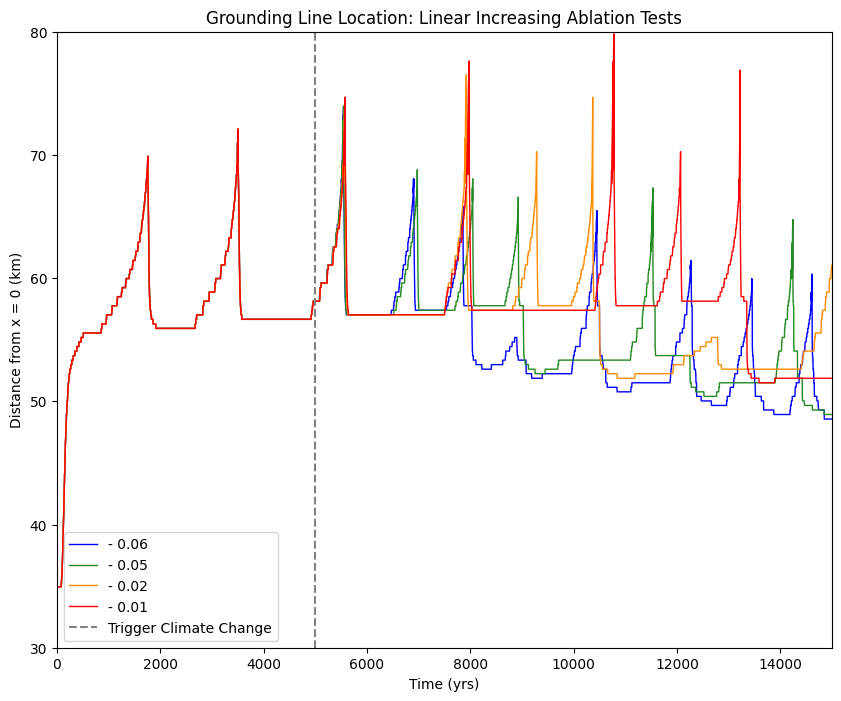

In [81]:
plt.figure(figsize=(10, 8))

plt.plot(time_06, GL_km_amin06, label='- 0.06', color = 'blue', linewidth = 1)
plt.plot(time_05, GL_km_amin05, label='- 0.05', color = 'forestgreen', linewidth = 1)
plt.plot(time_02, GL_km_amin02, label='- 0.02', color = 'darkorange', linewidth = 1)
plt.plot(time_01, GL_km_amin01, label='- 0.01', color = 'red', linewidth = 1)
# plt.plot(time_amin_amax, GL_km_amax_amin_05, color = 'black', label='Amin & Amax - 0.05', linewidth = 3)
plt.axvline(x=5000, color ='gray', linestyle = '--', label = 'Trigger Climate Change')

plt.xlim(0,15000)
plt.ylim(30,80)

plt.title("Grounding Line Location: Linear Increasing Ablation Tests") 
plt.xlabel("Time (yrs)")
plt.ylabel("Distance from x = 0 (km)")
plt.legend(loc = 3)